In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from stock_price_handler import load_stock_prices, get_log_returns
from plots import histogram

In [2]:
TIME_INCREMENT = 5
STOCK_NAME = "nestle.csv"

In [3]:
stock_prices = load_stock_prices(STOCK_NAME)

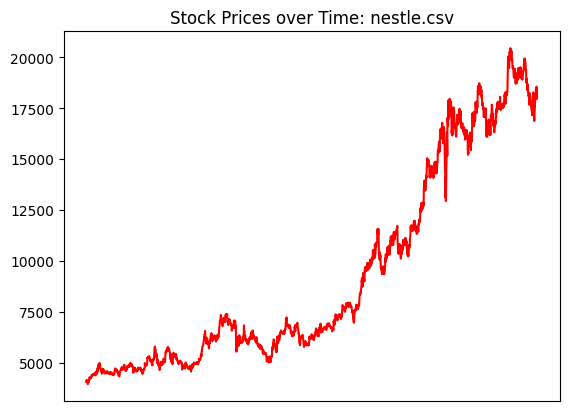

In [4]:
plt.plot(stock_prices, c="red")
plt.xticks([])
plt.title("Stock Prices over Time: " + STOCK_NAME)
plt.show()

In [5]:
log_returns = get_log_returns(stock_prices)

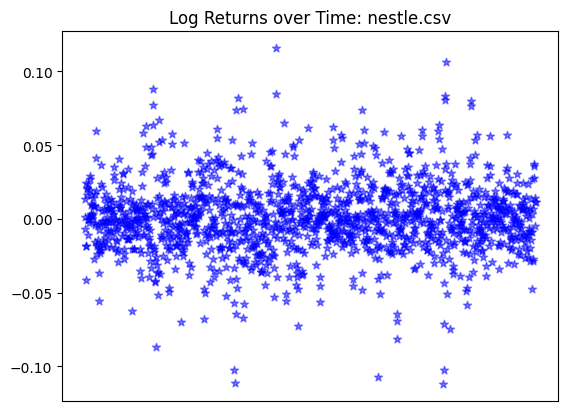

In [6]:
plt.scatter(np.arange(len(log_returns)), log_returns, c="blue", marker="*", alpha=.5)
plt.xticks([])
plt.title("Log Returns over Time: " + STOCK_NAME)
plt.show()

In [7]:
mean = np.mean(log_returns)
std = np.std(log_returns)
gaussians = stats.norm.rvs(loc=mean, scale=std, size=int(1e4))

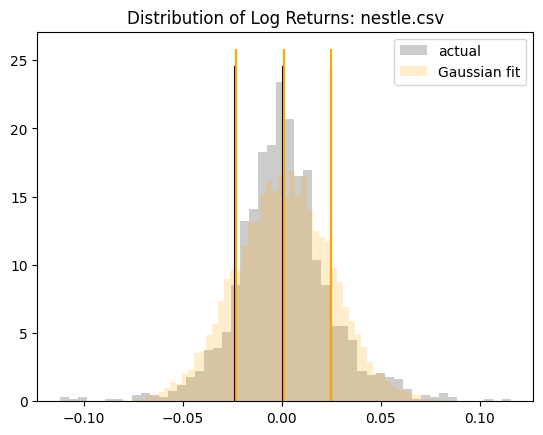

In [8]:
for array, label, color in [(log_returns, "actual", "black"), (gaussians, "Gaussian fit", "orange")]:
    histogram(array, label, color)

plt.title("Distribution of Log Returns: " + STOCK_NAME)
plt.legend()
plt.show()